### 基于梯度下降法编写程序实现回归算法，并自行使用模拟数据进行测试，同时对同样的模拟数据进行两种算法的比较(python sklearn LinearRegression和自己实现的线性回归算法)

In [8]:
#建造一个最简单的阶梯下降
def regression(data,alpha,lamba):
    import numpy as np
    n=len(data[0])-1
    theta=np.zeros(n)
    for times in range(100):
        for d in data:
            x=d[:-1]
            y=d[-1]
            g=np.dot(theta,x)-y
            theta=theta-alpha*g*x+lamda*theta
        print(times,theta)
    return theta

构造一个完整的梯度下降算法
===

In [329]:
# 数据校验
def err(X, Y):
    X=X.values.T
    if len(X[0]) != len(Y):
        raise Exception("参数异常")
    else:
        m = len(X[0])
        for l in X:
            if len(l) != m:
                raise Exception("参数异常")
 

    # 计算差异值
def diffy(x, y, a):
    import numpy as np
    import pandas as pd
    x=x.values.T
    y=y.values
    lx = len(x)
    la = len(a)
    if lx == la:
        result=np.dot(a,x)
        return np.array(y - result)
    elif lx + 1 == la:
        la=la-1
        result=np.dot(x,a[0:la])+np.array(a[-1])
        return np.array(y - result)
    else :
        raise Exception("参数异常")

                
## 要求X必须是List集合，Y也必须是List集合
def fit(s, Y, alphas, threshold=1e-6, maxIter=200, intercept=True):
    import math
    import numpy as np
    if intercept:
        X=s.iloc[:,:]
        X['cs']=1
    else:
        X=s
    ## 校验
    err(X, Y)
    ## 开始模型构建
    l = len(alphas)
    m = len(Y)
    n = len(X.T)
    B = [True for i in range(l)]
    ## 差异性(损失值)
    J = [np.nan for i in range(l)]
   
    # 1. 随机初始化0值(全部为0), a的最后一列为常数项
    a = np.zeros([l,n])
    # 2. 开始计算
    for times in range(maxIter):
        for i in range(l):
            if not B[i]:
                # 如果当前alpha的值已经计算到最优解了，那么不进行继续计算
                continue
            
          
            ta=a[i]
            alpha = alphas[i]
            ta+=a[i]+alpha*diffy(X,Y,a[i]).dot(X)
            
               
            ## 计算完一个alpha值的0的损失函数
            flag = True
            js = 0
            js += np.power(diffy(X, Y, a[i]),2).sum()
            if js > J[i]:
                flag = False
                break;
            if flag:
                J[i] = js
                a[i]=ta
            else:
                # 标记当前alpha的值不需要再计算了
                B[i] = False        
        ## 计算完一个迭代，当目标函数/损失函数值有一个小于threshold的结束循环
        r = [0 for j in J if j <= threshold]
        if len(r) > 0:
            break
        # 如果全部alphas的值都结算到最后解了，那么不进行继续计算
        r = [0 for b in B if not b]
        if len(r) > 0:
            break;
    # 3. 获取最优的alphas的值以及对应的0值
    min_a = a[0]
    min_j = J[0]
    min_alpha = alphas[0]
    for i in range(l):
        if J[i] < min_j:
            min_j = J[i]
            min_a = a[i]
            min_alpha = alphas[i]
    
    print("最优的alpha值为:",min_alpha)
    
    # 4. 返回最终的0值
    return min_a

# 预测结果
def hcpredict(X,a):
    if len(X.T)==len(a):
        Y=X.dot(a)
    else:
        la=len(a)-1
        Y=X.dot(a[0:la])+np.array([a[-1]])
    return Y

# 计算实际值和预测值之间的相关性
def hcScore(y,py):
    if len(y) != len(py):
        raise Exception("参数异常")
    import math 
    import numpy as np
    avgy = np.average(y)
    m = len(y)
    rss = 0.0
    tss = 0
    for i in range(m):
        rss += math.pow(y[i] - py[i], 2)
        tss += math.pow(y[i] - avgy, 2)
    r = 1.0 - 1.0 * rss / tss
    return r

In [330]:
import numpy as np
import pandas as pd
df=pd.DataFrame({
    'math':[1,2,3,4,5,6,7,8],
    'en':[1,2,3,4,5,6,7,8],
    'chinese':[2,4,6,8,10,12,14,16]
})

x1=df[['en','math']]
y2=df['chinese']


d1=df

# a = np.ones([1,len(x.T)])
# ts=a+diffy(x,y,a).dot(x)
# # diffy(x,y,a)
# ts
d1
# diffy(x,y,a)
# x.dot(alp)
y2

0     2
1     4
2     6
3     8
4    10
5    12
6    14
7    16
Name: chinese, dtype: int64

In [332]:
alp=fit(x,y,alphas=np.logspace(-3,2,100))
yp=hcpredict(x,alp)
hcScore(y,yp)
df


最优的alpha值为: 0.00572236765935


,chinese,en,math
0,2,1,1
1,4,2,2
2,6,3,3
3,8,4,4
4,10,5,5
5,12,6,6
6,14,7,7
7,16,8,8


In [249]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression,Ridge, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [250]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [344]:
# warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)
## 创建模拟数据
np.random.seed(0)
np.set_printoptions(linewidth=1000, suppress=True)
N = 10
x = np.linspace(0, 6, N) + np.random.randn(N)
y = 1.8*x**3 + x**2 - 14*x - 7 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1
x=pd.DataFrame(x)
x.columns=['moni']
y=pd.DataFrame(y)
y=y.iloc[:,0]

In [345]:
# ma = fit(x,y,np.logspace(-4,-2,100), intercept=True)
# y_hat2 = hcpredict(x_hat, ma)
# s2 = hcScore(y, predict(x,ma))

# if len(x_hat.T)==len(ma):
#     Y=x_hat.dot(ma)
# else:
#     la=len(ma)-1
#     Y=x_hat.dot(ma[0:(len(ma)-1)])+np.array([ma[-1]])
 
x

,moni
0,1.764052
1,1.066824
2,2.312071
3,4.240893
4,4.534225
5,2.356055
6,4.950088
7,4.515309
8,5.230114
9,6.410599


C:\Users\hc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.837437698825
模块自带实现===============
参数列表: [ 72.0576022]
截距: -163.711329657
最优的alpha值为: 0.00215443469003
自定义实现模型=============
参数列表: [ 33.46912664   5.75239347]


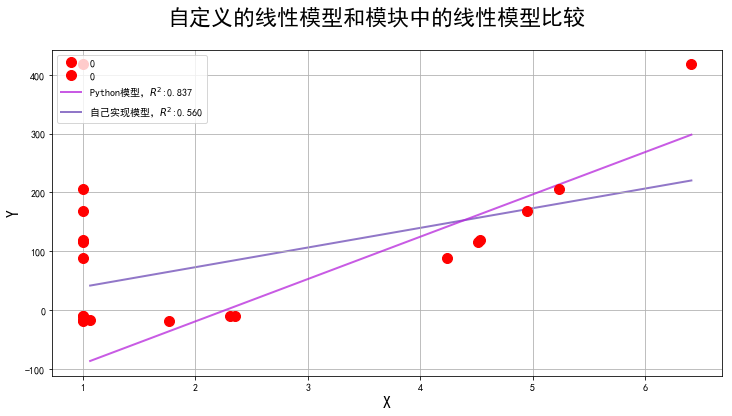

In [346]:
plt.figure(figsize=(12,6), facecolor='w')

## 模拟数据产生
x_hat = np.linspace(x.values.min(), x.values.max(), num=100)
x_hat.shape = -1,1
x_hat=pd.DataFrame(x_hat,columns=['moni'])
## 线性模型
model = LinearRegression()
model.fit(x,y)
y_hat = model.predict(x_hat)
s1 = calcRScore(y, model.predict(x))
print(model.score(x,y)) ## 自带R^2输出
print ("模块自带实现===============")
print ("参数列表:", model.coef_)
print ("截距:", model.intercept_)


## 自模型
ma = fit(x,y,np.logspace(-4,-2,100), intercept=True)
y_hat2 = hcpredict(x_hat, ma)
s2 = hcScore(y, predict(x,ma))
print ("自定义实现模型=============")
print ("参数列表:", ma)

## 开始画图
plt.plot(x, y, 'ro', ms=10, zorder=3)
plt.plot(x_hat, y_hat, color='#b624db', lw=2, alpha=0.75, label=u'Python模型，$R^2$:%.3f' % s1, zorder=2)
plt.plot(x_hat, y_hat2, color='#6d49b6', lw=2, alpha=0.75, label=u'自己实现模型，$R^2$:%.3f' % s2, zorder=1)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.suptitle(u'自定义的线性模型和模块中的线性模型比较', fontsize=22)
plt.show()

,0
0,1.066824
1,1.120801
2,1.174779
3,1.228756
4,1.282734


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
y1 = y.ravel()
clf.fit(x,y1)
print "自带梯度下降法R方:", clf.score(x,y1)
y_hat3=clf.predict(x_hat)
s3=calcRScore(y, clf.predict(x))

## 开始画图
plt.plot(x, y, 'ro', ms=10, zorder=3)
plt.plot(x_hat, y_hat, color='#b624db', lw=2, alpha=0.75, label=u'Python模型，$R^2$:%.3f' % s1, zorder=2)
plt.plot(x_hat, y_hat2, color='#6d49b6', lw=2, alpha=0.75, label=u'自己实现模型，$R^2$:%.3f' % s2, zorder=1)
plt.plot(x_hat, y_hat3, color='#6daaba', lw=2, alpha=0.75, label=u'自带梯度下降方法，$R^2$:%.3f' % s3, zorder=1)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.suptitle(u'自定义的线性模型和模块中的线性模型比较', fontsize=22)
plt.show()

SyntaxError: invalid syntax (<ipython-input-19-f352236cae76>, line 5)

In [12]:
s3

0.9999999989274823